# XG Boost
Default parameters
max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'

In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
import xgboost as xg
from sklearn.compose import TransformedTargetRegressor

In [2]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib13']

# Validation curves

# colsample_bytree
- number of columns used by each tree. In order to avoid some columns to take too much credit for the prediction (think of it like in recommender systems when you recommend the most purchased products and forget about the long tail), take out a good proportion of columns. Values from 0.3 to 0.8 if you have many columns (especially if you did one-hot encoding), or 0.8 to 1 if you only have a few columns.
- colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

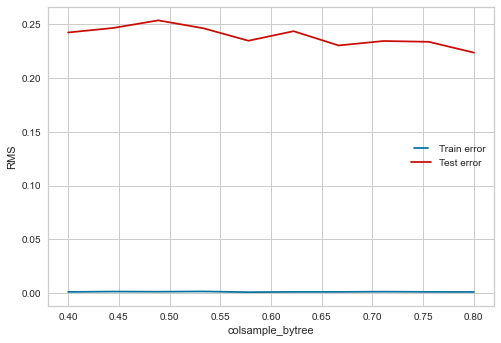

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_estimators = np.linspace(0.4, 0.8, 10, endpoint=True)
train_results = []
test_results = []
for eta in n_estimators:
    mod = xg.XGBRegressor(colsample_bytree=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('colsample_bytree')
plt.show()


# gamma
- gamma [default=0, alias: min_split_loss]
- A node is split only when the resulting split gives a positive reduction in the loss function.
- Gamma specifies the minimum loss reduction required to make a split.
- It makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
- The larger gamma is, the more conservative the algorithm will be.
- Range: [0,∞]

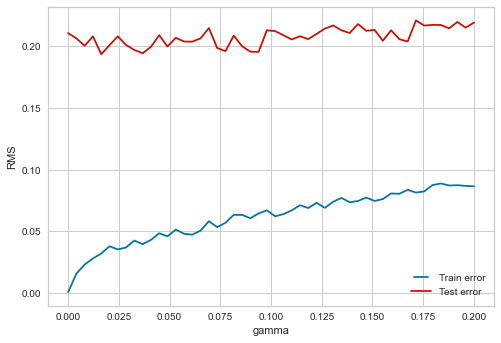

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_estimators = np.linspace(0, 0.2, 50, endpoint=True)
train_results = []
test_results = []
for eta in n_estimators:
    mod = xg.XGBRegressor(gamma=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('gamma')
plt.show()


# N estimators

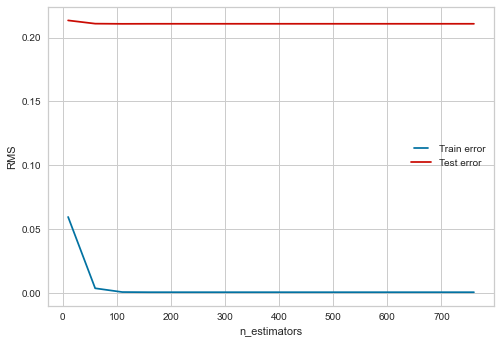

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_estimators =  np.arange(10,800,50)
train_results = []
test_results = []
for eta in n_estimators:
    mod = xg.XGBRegressor(n_estimators=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('n_estimators')
plt.show()


# Learning rate
-  usually between 0.1 and 0.01. If you’re focused on performance and have time in front of you, decrease incrementally the learning rate while increasing the number of trees.

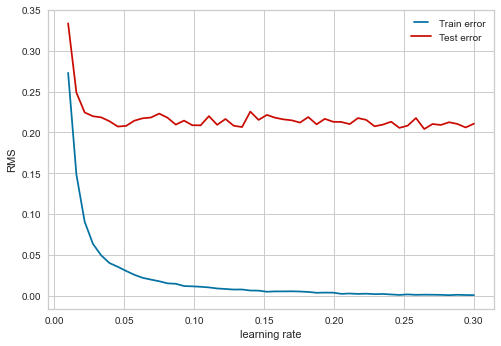

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = np.linspace(0.01,0.3,50)
train_results = []
test_results = []
for eta in learning_rates:
    mod = xg.XGBRegressor(learning_rate=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('learning rate')
plt.show()


# Max_depth
- max_depth [default=6]
- The maximum depth of a tree, same as GBM.
- It is used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
- Increasing this value will make the model more complex and more likely to overfit.
- The value 0 is only accepted in lossguided growing policy when tree_method is set as hist and it indicates no limit on depth.
- We should be careful when setting large value of max_depth because XGBoost aggressively consumes memory when training a deep tree.
- range: [0,∞] (0 is only accepted in lossguided growing policy when tree_method is set as hist.
- Should be tuned using CV.
- Typical values: 3-10

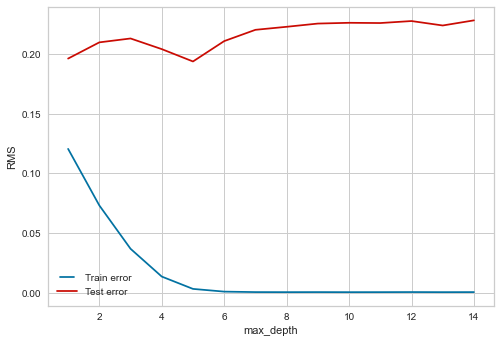

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = np.arange(1, 15, 1)
train_results = []
test_results = []
for eta in learning_rates:
    mod = xg.XGBRegressor(max_depth=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_depth')
plt.show()

# min_child_weight
- min_child_weight [default=1]
- It defines the minimum sum of weights of all observations required in a child.
- This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
- It is used to control over-fitting.
- Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
- Too high values can lead to under-fitting.
- Hence, it should be tuned using CV.
- The larger min_child_weight is, the more conservative the algorithm will be.
- range: [0,∞]

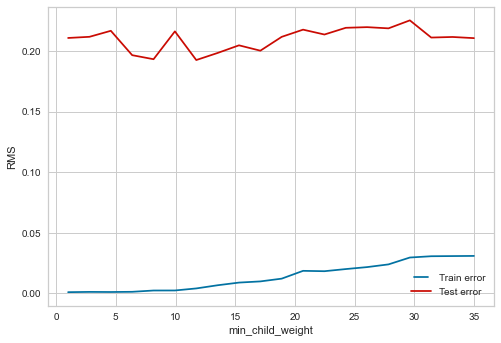

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = np.linspace(1,35, 20, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    mod =xg.XGBRegressor(min_child_weight=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_child_weight')
plt.show()

# subsample
- subsample [default=1]
- It denotes the fraction of observations to be randomly samples for each tree.
- Subsample ratio of the training instances.
- Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. - This will prevent overfitting.
- Subsampling will occur once in every boosting iteration.
- Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
- Typical values: 0.5-1
- range: (0,1]
- which is for each tree the % of rows taken to build the tree. I recommend not taking out too many rows, as performance will drop a lot. Take values from 0.8 to 1.

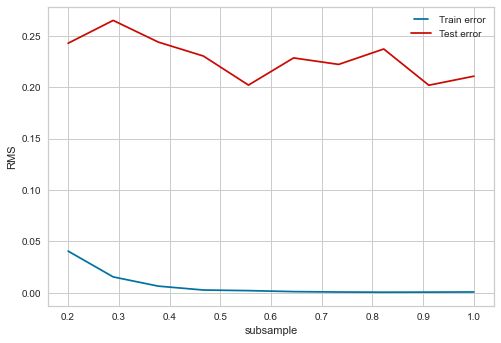

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = np.linspace(0.2,1, 10, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    mod = xg.XGBRegressor(subsample=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('subsample')
plt.show()

# scale_pos_weight
- scale_pos_weight [default=1]
- It controls the balance of positive and negative weights,
- It is useful for imbalanced classes.
- A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.
- A typical value to consider: sum(negative instances) / sum(positive instances).

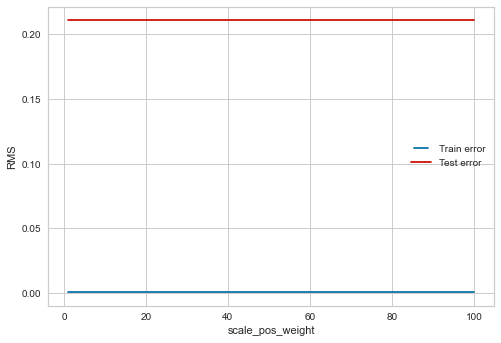

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = np.linspace(1, 100, 10, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    mod = xg.XGBRegressor(scale_pos_weight=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('scale_pos_weight')
plt.show()

# reg_alpha
- alpha [default=0, alias: reg_alpha]
- L1 regularization term on weights (analogous to Lasso regression).
- It can be used in case of very high dimensionality so that the algorithm runs faster when implemented.
- Increasing this value will make model more conservative.

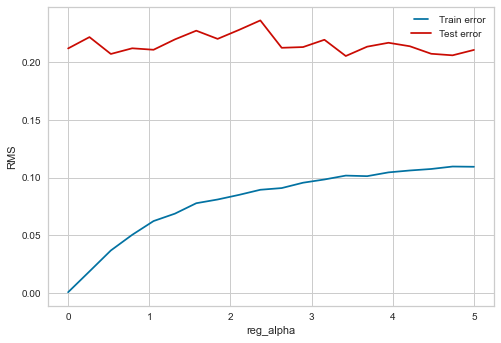

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates =np.linspace(1e-5, 5, 20, endpoint=True)#[1e-5, 1e-2, 0.1, 1, 100]#np.linspace(0, 200, 20, endpoint=True) #[0, 0.001, 0.005, 0.01, 0.05]#
train_results = []
test_results = []
for eta in learning_rates:
    mod= xg.XGBRegressor(reg_alpha=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('reg_alpha')
plt.show()

# reg_lambda
- lambda [default=1, alias: reg_lambda]
- L2 regularization term on weights (analogous to Ridge regression).
- This is used to handle the regularization part of XGBoost.
- Increasing this value will make model more conservative.

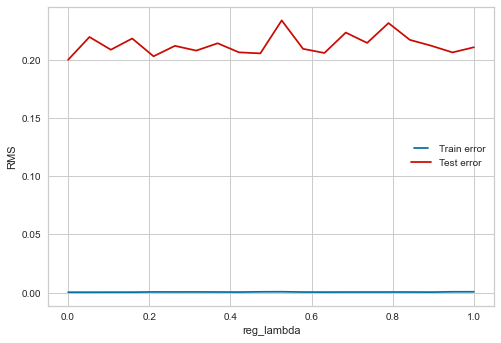

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates =np.linspace(0, 1, 20, endpoint=True) #[0, 0.001, 0.005, 0.01, 0.05]#[1e-5, 1e-2, 0.1, 1, 100]
train_results = []
test_results = []
for eta in learning_rates:
    mod= xg.XGBRegressor(reg_lambda=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('reg_lambda')
plt.show()

## max_delta_step 
- [default=0]

- Maximum delta step we allow each leaf output to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative. Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced. Set it to value of 1-10 might help control the update.

- range: [0,∞]

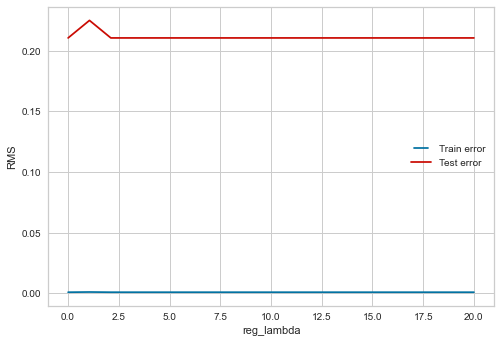

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates =np.linspace(0, 20, 20, endpoint=True) #[0, 0.001, 0.005, 0.01, 0.05]#[1e-5, 1e-2, 0.1, 1, 100]
train_results = []
test_results = []
for eta in learning_rates:
    mod = xg.XGBRegressor(max_delta_step=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('reg_lambda')
plt.show()

---
---

# Random Hyperparameter Grid

In [518]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Head]

In [497]:
## Chest
# param_tuning = {
# #     'booster':['gbtree', 'gblinear' ,'dart'],
# #     'validate_parameters':[True, False],
#         'learning_rate': [0.1,0.15,0.2],
#         'max_depth': [3,4,5],
#         'min_child_weight': [20.3,20.5,20.8],
#     'max_delta_step':[12,13,15],
#         'subsample': [0.8,0.85,0.9],
#          'gamma'  : [10.5,11,11.5],
#         'colsample_bytree': [0.875,0.9,0.915],
#         'n_estimators' : [105,110,115],
# #     'sampling_method':['uniform','gradient_based'],
# #     'tree_method':['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
# #     'reg_alpha':[0.00001,3,3.5],
# #     'reg_lambda':[1e-05,3,4]   
    
#  }

# ## Neck
# param_tuning = {
#         'learning_rate': [0.95,0.1,0.15,],
#         'max_depth': [1,2,3],
#         'min_child_weight': [1,3,5],
# #     'max_delta_step':[12,13,15],
#         'subsample': [0.5],
#          'gamma'  : [0.02,0.03,0.04],
#         'colsample_bytree': [0.925,0.95,0.975],
#         'n_estimators' : [60,70,80]}


# ## Head acc
# param_tuning = {
#         'learning_rate': [0.95,0.1,0.15],
#         'max_depth': [3,4,5],
#         'min_child_weight': [1,3,5],
# #     'max_delta_step':[12,13,15],
#         'subsample': [0.5,0.55,0.6],
#          'gamma'  : [0.00025,0.0005,0.00075],
#         'colsample_bytree': [0.65,0.7,0.75],
#         'n_estimators' : [60,70,80]}

## HIC
param_tuning = {
        'learning_rate': [0.05,0.06,0.075],
        'max_depth': [1,2,3],
        'min_child_weight': [10,11,12],
#     'max_delta_step':[12,13,15],
        'subsample': [0.5],
         'gamma'  : [0.02,0.03,0.04],
        'colsample_bytree': [0.925,0.95,0.975],
        'n_estimators' : [65,70,75]}

In [498]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = xg.XGBRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_tuning, n_iter = 400, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 1954 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 3898 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  1.4min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [499]:
rf_random.best_params_

{'subsample': 0.5,
 'n_estimators': 70,
 'min_child_weight': 10,
 'max_depth': 2,
 'learning_rate': 0.075,
 'gamma': 0.03,
 'colsample_bytree': 0.975}

In [500]:
rf_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.975, gamma=0.03, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.075, max_delta_step=0, max_depth=2,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=70, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [520]:
##CHest
# mod=xg.XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
#              colsample_bynode=None, colsample_bytree=0.875, gamma=11, gpu_id=-1,
#              importance_type='gain', interaction_constraints=None,
#              learning_rate=0.06, max_delta_step=12, max_depth=1,
#              min_child_weight=15, monotone_constraints=None,
#              n_estimators=40, n_jobs=12, num_parallel_tree=None, random_state=0,
#              reg_alpha=1e-05, reg_lambda=3, sampling_method='gradient_based',
#              scale_pos_weight=1, subsample=0.5, tree_method='approx',
#              validate_parameters=True, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
#              colsample_bynode=None, colsample_bytree=0.875, gamma=11, gpu_id=-1,
#              importance_type='gain', interaction_constraints=None,
#              learning_rate=0.06, max_delta_step=12, max_depth=1,
#              min_child_weight=15, monotone_constraints=None,
#              n_estimators=40, n_jobs=12, num_parallel_tree=None, random_state=0,
#              reg_alpha=1e-05, reg_lambda=3, sampling_method='gradient_based',
#              scale_pos_weight=1, subsample=0.5, tree_method='approx',
#              validate_parameters=True, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.9, gamma=11, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.06, max_delta_step=14, max_depth=2,
#              min_child_weight=13, monotone_constraints='()',
#              n_estimators=40, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=1e-05, reg_lambda=4, sampling_method='uniform',
#              scale_pos_weight=1, subsample=0.5, tree_method='auto',
#              validate_parameters=True, verbosity=None)
# mod=xg.XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
#              colsample_bynode=None, colsample_bytree=0.9, gamma=10, gpu_id=None,
#              importance_type='gain', interaction_constraints=None,
#              learning_rate=0.08, max_delta_step=14, max_depth=2,
#              min_child_weight=15, monotone_constraints=None,
#              n_estimators=70, n_jobs=None, num_parallel_tree=None,
#              random_state=None, reg_alpha=1e-05, reg_lambda=3,
#              sampling_method='gradient_based', scale_pos_weight=None,
#              subsample=0.5, tree_method='gpu_hist', validate_parameters=False,
#              verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.895, gamma=10, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.08, max_delta_step=13, max_depth=2,
#              min_child_weight=13, monotone_constraints='()',
#              n_estimators=70, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=1e-05, reg_lambda=1e-05, scale_pos_weight=1,
#              subsample=0.5, tree_method='exact', validate_parameters=False,
#              verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.925, gamma=11, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.08, max_delta_step=12, max_depth=2,
#              min_child_weight=13, monotone_constraints='()',
#              n_estimators=75, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=1e-05, reg_lambda=1e-05, scale_pos_weight=1,
#              subsample=0.5, tree_method='exact', validate_parameters=1,
#              verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.925, gamma=11, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.08, max_delta_step=13, max_depth=2,
#              min_child_weight=13, monotone_constraints='()',
#              n_estimators=85, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.55,
#              tree_method='exact', validate_parameters=1, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.93, gamma=11, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.08, max_delta_step=13, max_depth=3,
#              min_child_weight=16.2, monotone_constraints='()',
#              n_estimators=90, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
#              tree_method='exact', validate_parameters=1, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.93, gamma=11, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.08, max_delta_step=13, max_depth=3,
#              min_child_weight=20.5, monotone_constraints='()',
#              n_estimators=90, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
#              tree_method='exact', validate_parameters=1, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.95, gamma=11.5, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.1, max_delta_step=12, max_depth=3,
#              min_child_weight=20.8, monotone_constraints='()',
#              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.85,
#              tree_method='exact', validate_parameters=1, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.9, gamma=11.5, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.1, max_delta_step=12, max_depth=3,
#              min_child_weight=20.5, monotone_constraints='()',
#              n_estimators=110, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.85,
#              tree_method='exact', validate_parameters=1, verbosity=None)
#***
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.875, gamma=10.5, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.15, max_delta_step=13, max_depth=3,
#              min_child_weight=20.8, monotone_constraints='()',
#              n_estimators=110, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.85,
#              tree_method='exact', validate_parameters=1, verbosity=None)
#------------------------------------------------------------------------------------------
#Neck
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.9, gamma=11.5, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.2, max_delta_step=13, max_depth=3,
#              min_child_weight=20.5, monotone_constraints='()',
#              n_estimators=105, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
#              tree_method='exact', validate_parameters=1, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.925, gamma=0.02, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.2, max_delta_step=0, max_depth=4,
#              min_child_weight=5, monotone_constraints='()',
#              n_estimators=70, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
#              tree_method='exact', validate_parameters=1, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.975, gamma=0.02, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.1, max_delta_step=0, max_depth=4,
#              min_child_weight=3, monotone_constraints='()',
#              n_estimators=70, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
#              tree_method='exact', validate_parameters=1, verbosity=None)
#************
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.925, gamma=0.02, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.1, max_delta_step=0, max_depth=2,
#              min_child_weight=5, monotone_constraints='()',
#              n_estimators=80, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
#              tree_method='exact', validate_parameters=1, verbosity=None)
# ----------------------------------------------------------------------------------
##head acc
# #*****
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.925, gamma=0.02, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.15, max_delta_step=0, max_depth=1,
#              min_child_weight=5, monotone_constraints='()',
#              n_estimators=60, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
#              tree_method='exact', validate_parameters=1, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.75, gamma=0.00075,
#              gpu_id=-1, importance_type='gain', interaction_constraints='',
#              learning_rate=0.1, max_delta_step=0, max_depth=3,
#              min_child_weight=1, monotone_constraints='()',
#              n_estimators=60, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
#              tree_method='exact', validate_parameters=1, verbosity=None)
#----------------------------------------------------------------------------
##HIC
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.7, gamma=0.00075, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.1, max_delta_step=0, max_depth=3,
#              min_child_weight=1, monotone_constraints='()',
#              n_estimators=70, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
#              tree_method='exact', validate_parameters=1, verbosity=None)
mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0.02, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=75, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.925, gamma=0.04, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.1, max_delta_step=0, max_depth=3,
#              min_child_weight=1, monotone_constraints='()',
#              n_estimators=70, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
#              tree_method='exact', validate_parameters=1, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.95, gamma=0.03, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.1, max_delta_step=0, max_depth=5,
#              min_child_weight=1, monotone_constraints='()',
#              n_estimators=65, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
#              tree_method='exact', validate_parameters=1, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.95, gamma=0.03, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.1, max_delta_step=0, max_depth=3,
#              min_child_weight=16, monotone_constraints='()',
#              n_estimators=70, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
#              tree_method='exact', validate_parameters=1, verbosity=None)
# mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.975, gamma=0.03, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.075, max_delta_step=0, max_depth=2,
#              min_child_weight=10, monotone_constraints='()',
#              n_estimators=70, n_jobs=12, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
#              tree_method='exact', validate_parameters=1, verbosity=None)

In [521]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [522]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')


<Figure size 576x396 with 0 Axes>

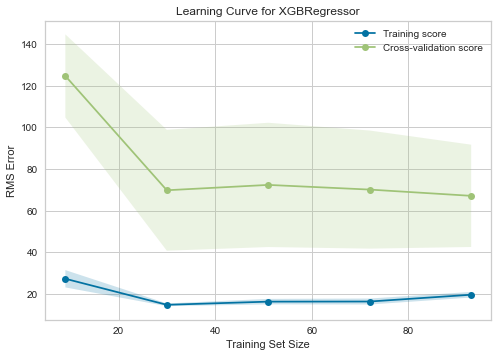

In [523]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [524]:
X = X.to_numpy()
y = y.to_numpy()


In [525]:
y_Test=y_Test.to_numpy()

In [526]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 108.229403

Root Mean squared error: 41.258577

Root Mean squared error: 38.624949

Root Mean squared error: 95.637135

Root Mean squared error: 61.657882

Root Mean squared error: 56.560901

Root Mean squared error: 34.521675

Root Mean squared error: 65.464682

Root Mean squared error: 93.782742

Root Mean squared error: 58.416343

error COV--->0    0.835457
dtype: float64  error mean --->0    44.271794
Name: mean, dtype: float64  error std --->0    36.987169
Name: std, dtype: float64


# train score

In [527]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.193289
dtype: float64  error mean --->0    16.561432
Name: mean, dtype: float64  error std --->0    19.76257
Name: std, dtype: float64


---
---

# Grid search

In [251]:
param_tuning = {
        'learning_rate': [0.1,0.15,0.2],
        'max_depth': [3,4,5],
        'min_child_weight': [20.3,20.5,20.8],
    'max_delta_step':[12,13,15],
        'subsample': [0.8,0.85,0.9],
         'gamma'  : [10.5,11,11.5],
        'colsample_bytree': [0.875,0.9,0.915],
        'n_estimators' : [105,110,115]
    
 }

In [276]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Chest_deflection]


In [255]:
rf = xg.XGBRegressor()
reg = GridSearchCV(rf,param_grid = param_tuning ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)
    

Fitting 10 folds for each of 6561 candidates, totalling 65610 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, mono...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.875, 0.9, 0.915],
                         'gamma': [10.5, 11, 11.5],
                         'learning_rate': [0.1, 0.15,

In [256]:
reg.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.875, gamma=11.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=15, max_depth=3,
             min_child_weight=20.3, missing=nan, monotone_constraints='()',
             n_estimators=115, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

---
---

In [277]:
# mod=GradientBoostingRegressor(subsample=0.5,n_estimators=110,min_samples_split=3,min_samples_leaf=1,max_features='auto',max_depth=25,learning_rate=0.02)#--0.64
mod=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.875, gamma=11.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=15, max_depth=3,
             min_child_weight=20.3, monotone_constraints='()',
             n_estimators=115, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [278]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [279]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
kf=cv

## Learning Curve

<Figure size 576x396 with 0 Axes>

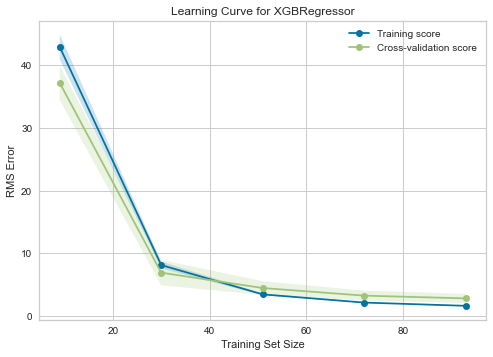

In [280]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

## Unknown data test

In [281]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 4.160942

Root Mean squared error: 2.814887

Root Mean squared error: 2.094712

Root Mean squared error: 3.218605

Root Mean squared error: 2.726476

Root Mean squared error: 2.455479

Root Mean squared error: 2.780050

Root Mean squared error: 4.353566

Root Mean squared error: 2.484849

Root Mean squared error: 2.054611

error COV--->0    0.821706
dtype: float64  error mean --->0    2.126364
Name: mean, dtype: float64  error std --->0    1.747247
Name: std, dtype: float64


# train score

In [282]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    0.874416
dtype: float64  error mean --->0    1.325895
Name: mean, dtype: float64  error std --->0    1.159384
Name: std, dtype: float64
